概要：tensorflow的几个重要功能，包括GPU加速，自动求导等。

1.自动求导。

In [2]:
import tensorflow as tf 

# 创建4个张量
a = tf.constant(1.)
b = tf.constant(2.)
c = tf.constant(3.)
w = tf.constant(4.)

with tf.GradientTape() as tape:# 构建梯度环境
    tape.watch([w]) # 将w加入梯度跟踪列表
    # 构建计算过程
    y = a * w**2 + b * w + c
# 求导
[dy_dw] = tape.gradient(y, [w])
print(dy_dw)

tf.Tensor(10.0, shape=(), dtype=float32)


考虑$ y = a*w^2 + b*w + c$

$ \frac{d_y}{d_w} = 2a*w + b $

考虑在(a, b, c, w) = (1,2,3,4)处的导数，
$ \frac{d_y}{d_w} $ = 2 ∗ 1 ∗ 4 + 2 = 10

2.GPU加速，我的电脑没有GPU，只能模拟CPU。

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.0015402360010909888
run time: 0.0010101137690412543
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.000643409708303011
run time: 0.0005080173586407
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.0004886755944113474
run time: 0.000506043709236792
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.0005238065539430181
run time: 0.0005135435769858532
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.0008455114080874182
run time: 0.0008920895342185986
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
warmup: 0.0018568093667852281
run time: 0.0017794423098251855
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
war

d:\python36\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


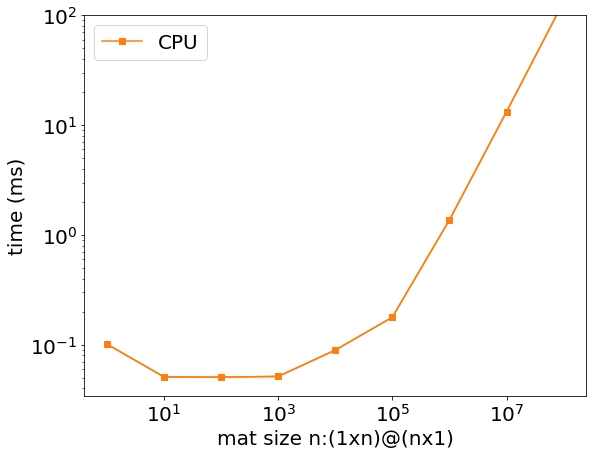

In [5]:
import  numpy as np
import  matplotlib
from    matplotlib import pyplot as plt

%matplotlib inline
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiti']
matplotlib.rcParams['axes.unicode_minus']=False 


import tensorflow as tf
import timeit

cpu_data = []
for n in range(9):
    n = 10**n
    # 创建在CPU上运算的2个矩阵
    with tf.device('/cpu:0'):
        cpu_a = tf.random.normal([1, n])
        cpu_b = tf.random.normal([n, 1])
        print(cpu_a.device, cpu_b.device)

    def cpu_run():
        with tf.device('/cpu:0'):
            c = tf.matmul(cpu_a, cpu_b)
        return c 

    # 第一次计算需要热身，避免将初始化阶段时间结算在内
    cpu_time = timeit.timeit(cpu_run, number=10)
    print('warmup:', cpu_time)
    # 正式计算10次，取平均时间
    cpu_time = timeit.timeit(cpu_run, number=10)
    print('run time:', cpu_time)
    cpu_data.append(cpu_time/10)

    del cpu_a,cpu_b

x = [10**i for i in range(9)]
cpu_data = [1000*i for i in cpu_data]
plt.plot(x, cpu_data, 'C1')
plt.plot(x, cpu_data, color='C1', marker='s', label='CPU')


plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([0,100])
plt.xlabel('mat size n:(1xn)@(nx1)')
plt.ylabel('time (ms)')
plt.legend()